### **Análisis demografico y proyecciones poblacionales**
#### **Caracteristicas**
#### **Objetivo:** Estimar la evolución de la población de diferentes paises o regiones y analizar el impacto de estos cambios demográficos

#### **Variables:** Son muchisimas las variables que pueden producir estos cambios de densidad poblacional. Por ahora nos centraremos en la tasa de natalidad o fertilidad y veremos como ésta se ve afectada por pais o región a lo largo del tiempo.
#### Mencionamos algunas de las variables que pueden impactar en la tasa de natalidad:
#### - Tasa de fertilidad
#### - Tasa de natalidad
#### - Esperanza de vida
#### - Tasa de mortalidad infantil
#### - Nivel de urbanización 
#### - Ingreso per cápita
#### - Acceso a la educación
#### - Acceso a métodos anticonceptivos
#### - Religión y creencias culturales
#### -Acceso a los servicios de salud
#### -Desigualdad económica
#### -Cambio climático

### ** Insights clave:**
#### identificar cómo ha disminuido la fertilidad en diferentes regiones del mundo (paises desarrollados vs en desarrollo)
#### Factores socioeconómicos. Relacionar el nivel de desarrollo económico de un pais (PIB per cápita) y la educación con la fertilidad. Sociedades mas ricas y con mejor educación suelen tener menos hijos.

 


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

### Carda del dataset

In [2]:
df = pd.read_csv('API_SP_DYN_TFRT_IN_DS2_es_csv_v2_3436218.csv')

In [3]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN,NaN


## ***EDA***

### Limpieza de datos

In [4]:
# Buscamos filas duplicadas
duplicados = df[df.duplicated()]
print("Filas duplicadas excluyendo la primera aparición")
print(duplicados)

Filas duplicadas excluyendo la primera aparición
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, Unnamed: 68]
Index: []

[0 rows x 69 columns]


#### No tenemos filas duplicadas

In [6]:
# Buscamos valores nulos
df.isnull().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960               13
                 ... 
2020                7
2021                8
2022                8
2023              266
Unnamed: 68       266
Length: 69, dtype: int64

In [8]:
# vamos a ver cuales son estas filas
filas_con_null = df[df.isnull().any(axis = 1)]
filas_con_null

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN,NaN


### A priori vemos que hay países donde no nos figura el nombre pero si el código, eso lo solucionamos buscando el el país por su código, luego la columna (Serie) que corresponde al año 2023 no tiene datos, por lo cual podemos eliminarla. tambien tenemos registros en los que en muchos años no se han podido registrar valores de natalidad. en este caso no deberiamos borrar un registro porque estoy eliminando un país. Como primera medida podríamos llenar esos vacíos con el promedio del registro

In [9]:
df = df.drop('2023', axis = 1)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN


In [10]:
#Eliminamos tambien la columna que nos quedó sin nombre que vino vacía desde el dataSet 'Unnamed: 68'
df.drop('Unnamed: 68',axis = 1, inplace = True)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,2.09800,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.52900,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.42800,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,5.02600,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000


### LLenamos los registros vacios de los datos de natalidad por año con el promedio de cada uno de sus registros. para esto primero seleccionamos las columnas que tienen datos numericos, luego calculamos la media por columna y luego mediante una funcion lambda aplicamos ese promedio a cada registro que tenga valores nulos.

In [11]:
columnas_numericas = df.iloc[:,4:]
columnas_numericas.head(6)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,3.054000,...,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,6.828560,6.834418,...,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,7.363000,7.389000,...,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,6.612775,6.635181,...,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,7.332000,7.388000,...,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
5,6.455000,6.353000,6.207000,6.047000,5.849000,5.623000,5.465000,5.404000,5.338000,5.258000,...,1.69700,1.674000,1.613000,1.551000,1.491000,1.440000,1.414000,1.400000,1.390000,1.376000


In [12]:
promedio_por_registro = columnas_numericas.mean(axis = 1)
promedio_por_registro

0      2.401143
1      5.927532
2      6.959873
3      6.214732
4      6.795460
         ...   
261    3.687238
262    6.981762
263    3.876000
264    6.294270
265    5.263683
Length: 266, dtype: float64

In [13]:
# Ahora reemplazamos los valores con Nan solo en las columnas numericas con el promedio de la fila
df[columnas_numericas.columns] = columnas_numericas.apply(lambda fila: fila.fillna(fila.mean()))


#### Esto lo que hace es: df[columnas_numericas.columns] --> actualiza el df con los valores de columnas numericas, solo en las columnas que coinciden el indice, es decir llena el df con los valores de las columnas numericas(para utilizar solo esas)
### la funcion apply se aplica a cada fila fila del df (como si fuera un for) entonces lambda toma una fila y a esa fila le aplica fillna(fila.mean())

In [14]:
# Buscamos valores nulos
df.isnull().sum()

Country Name      2
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

### Descripcion del dataSet limpio

In [11]:
df.describe

<bound method NDFrame.describe of         Country Name Country Code  \
0              Aruba          ABW   
1                NaN          AFE   
2         Afganistán          AFG   
3                NaN          AFW   
4             Angola          AGO   
..               ...          ...   
261           Kosovo          XKX   
262  Yemen, Rep. del          YEM   
263        Sudáfrica          ZAF   
264           Zambia          ZMB   
265         Zimbabwe          ZWE   

                                        Indicator Name  Indicator Code  \
0    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
1    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
2    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
3    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
4    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
..                                                 ...             ...   
261

In [14]:
df.size

17822

In [15]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
Length: 67, dtype: object

In [15]:
df.shape

(266, 67)

In [18]:
df.info

<bound method DataFrame.info of         Country Name Country Code  \
0              Aruba          ABW   
1                NaN          AFE   
2         Afganistán          AFG   
3                NaN          AFW   
4             Angola          AGO   
..               ...          ...   
261           Kosovo          XKX   
262  Yemen, Rep. del          YEM   
263        Sudáfrica          ZAF   
264           Zambia          ZMB   
265         Zimbabwe          ZWE   

                                        Indicator Name  Indicator Code  \
0    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
1    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
2    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
3    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
4    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
..                                                 ...             ...   
261  

In [19]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,5.448716,5.427642,5.460803,5.492422,5.430514,5.385446,5.326849,5.272278,5.230322,5.17576,...,2.833163,2.810770,2.772710,2.739612,2.692368,2.650901,2.609374,2.559056,2.541380,2.499053
std,1.633196,1.636458,1.655440,1.663310,1.678858,1.703107,1.733690,1.738723,1.770489,1.78722,...,1.376245,1.343017,1.321650,1.296466,1.280135,1.265951,1.250609,1.240573,1.210641,1.193091
min,1.940000,1.940000,1.790000,1.820000,1.790000,1.740000,1.580000,1.800000,1.830000,1.87000,...,1.080000,1.205000,1.186000,0.987000,0.872000,0.917000,0.918000,0.837000,0.772000,0.701000
25%,4.389398,4.310750,4.408250,4.354000,4.118500,4.001000,3.820000,3.801500,3.643206,3.51000,...,1.760323,1.767105,1.740009,1.737164,1.705500,1.660539,1.624570,1.582951,1.596250,1.570250
50%,6.000500,5.956994,6.013791,6.086135,5.970000,5.941000,5.859000,5.782539,5.753680,5.70550,...,2.403318,2.369719,2.321897,2.306068,2.271500,2.247000,2.207500,2.162211,2.157859,2.140000
75%,6.715750,6.697750,6.692000,6.746250,6.698308,6.690410,6.689000,6.673750,6.668851,6.66250,...,3.620954,3.576158,3.515260,3.459786,3.398901,3.345922,3.313624,3.255717,3.231500,3.186000
max,8.234000,8.266000,8.285000,8.309000,8.330000,8.344000,8.356000,8.340000,8.315000,8.26400,...,7.344000,7.279000,7.211000,7.141000,7.084000,7.023000,6.961000,6.892000,6.820000,6.749000


### Para tener una idea general de los datos realizamos un gráfico de linea en la cuál representamos el promedio mundial (sin importar el pais) por año.

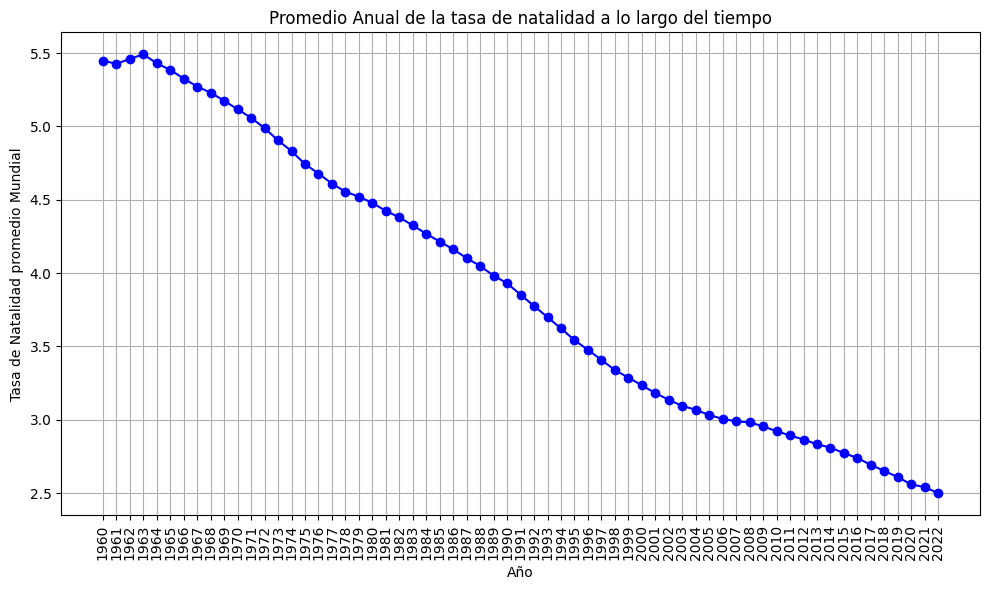

In [15]:
df_numerico = df.select_dtypes(include='number')
promedio_por_anio = df_numerico.mean()

plt.figure(figsize = (10,6))
plt.plot(promedio_por_anio.index, promedio_por_anio.values, marker ='o', linestyle ='-',color = 'b')

plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Tasa de Natalidad promedio Mundial')
plt.title('Promedio Anual de la tasa de natalidad a lo largo del tiempo')

plt.grid(True)
plt.tight_layout()
plt.show()

### Boxplot para ver la dispersión de la natalidad por país
### utilizamos el metodo melt() de pandas para ajusta el data frame ya que necesitamos que cada país tenga multiples filas para realizar el boxplot.  Es decir con melt hacemos que los años sean una sola columna, y cada pais se repetira en la columna 'country name' para cada año, entonces tendremos el dataFrame organizado para el boxplot


In [17]:
#filtramo el dataframe para que tengamos solo el nombre del pais con sus respectivos datos
df_filtrado = df.iloc[:,[0]].join(df.iloc[:, 4:])
#df_filtrado
#hacemos el melt del dataframe filtrado
df_melted = df_filtrado.melt(id_vars='Country Name', var_name='Año', value_name='Tasa de Natalidad')
#creamos el boxplot
import plotly.express as px
fig = px.box(df_melted, x='Country Name', y='Tasa de Natalidad', title="Distribución del Índice de Natalidad por País")
fig.update_layout(xaxis_tickangle=-90)
fig.show()
# Nota: para instalar la libreria: pip install plotly
#       para que corra en Jupyter Notebook: pip install "notebook>=5.3" "ipywidgets>=7.5"

### Podemos observar q a lo largo del tiempo, la distribución del indice de natalidad en la mayoria de los países se tiene sesgo hacia la derecha, es decir los datos se van concentrando a lo largo del tiempo en una menor tasa de natalidad.
### Otro indicio de la disminución constante de la tasa de natalidad es que la mayoria de las observaciones de puntos atípicos (1,5x rango intercuartil) son las de mayor tasa de natalidad, es decir es raro o atipico ver tasas de natalidad altas.

### Comparación entre regiones
#### Vamos a ver como afecta el PIB de regiones en donde los países tienen un alto PIB y regiones donde no.
#### Para esto tomaremos 10 paises de Europa, 10 de America del sur y 10 de Africa central


In [18]:
# hacemos una lista de 10 paises de europa
europa = ['España','Francia','Alemania','Rumania','Italia','Suecia','Grecia','Noruega','Estonia','Finlandia']
africa = ['Uganda','Congo','Angola','Nigeria','Camerún','Kenia','Ghana','Senegal','Zambia','Mozambique']
suramerica = ['Peru','Bolivia','Colombia','Ecuador','Chile','Brasil','Paraguay','Venezuela','Argentina','Brasil']

df_europa = df_filtrado[df_filtrado['Country Name'].isin(europa)]
df_africa = df_filtrado[df_filtrado['Country Name'].isin(africa)]
df_suramerica = df_filtrado[df_filtrado['Country Name'].isin(suramerica)]


In [15]:
df_africa

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Angola,6.708,6.790,6.872,6.954,7.036,7.116,7.194,7.267,7.332,...,5.953,5.864,5.774,5.686,5.600,5.519,5.442,5.371,5.304,5.209
42,Camerún,5.647,5.705,5.766,5.828,5.890,5.949,6.004,6.058,6.108,...,4.914,4.855,4.832,4.818,4.774,4.694,4.623,4.543,4.463,4.383
83,Ghana,6.847,6.886,6.947,6.980,6.931,6.890,6.875,6.910,6.911,...,4.136,4.050,4.050,3.911,3.713,3.731,3.683,3.623,3.563,3.507
165,Mozambique,6.315,6.379,6.446,6.492,6.517,6.546,6.592,6.625,6.668,...,5.340,5.131,5.062,4.992,4.922,4.852,4.783,4.713,4.644,4.561
174,Nigeria,6.364,6.353,6.356,6.349,6.362,6.367,6.386,6.401,6.420,...,5.738,5.664,5.616,5.584,5.523,5.447,5.379,5.309,5.237,5.143
207,Senegal,6.996,7.038,7.079,7.120,7.157,7.190,7.217,7.237,7.251,...,4.960,4.905,4.781,4.683,4.622,4.584,4.517,4.454,4.387,4.314
247,Uganda,6.936,6.968,6.997,7.023,7.053,7.085,7.116,7.148,7.187,...,5.618,5.463,5.306,5.174,5.052,4.932,4.809,4.693,4.585,4.468
264,Zambia,7.115,7.169,7.214,7.249,7.274,7.291,7.304,7.317,7.332,...,5.026,4.899,4.793,4.707,4.614,4.536,4.451,4.379,4.308,4.242


In [16]:
df_suramerica

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,Argentina,3.075,3.069,3.106,3.101,3.080,3.062,3.048,3.039,3.027,...,2.322,2.312,2.301,2.241,2.168,2.039,1.994,1.911,1.885,1.876
28,Bolivia,6.358,6.335,6.309,6.279,6.245,6.208,6.168,6.127,6.086,...,3.010,2.947,2.886,2.829,2.777,2.730,2.688,2.651,2.618,2.584
29,Brasil,6.061,6.044,5.995,5.929,5.818,5.675,5.529,5.368,5.202,...,1.748,1.767,1.777,1.709,1.736,1.749,1.703,1.649,1.641,1.626
39,Chile,4.697,4.655,4.602,4.536,4.457,4.364,4.259,4.144,4.025,...,1.786,1.774,1.737,1.676,1.598,1.564,1.545,1.537,1.537,1.539
45,Colombia,6.735,6.712,6.663,6.584,6.475,6.333,6.159,5.957,5.737,...,1.905,1.883,1.863,1.843,1.818,1.787,1.765,1.737,1.717,1.692
66,Ecuador,6.721,6.700,6.676,6.646,6.610,6.564,6.507,6.436,6.351,...,2.419,2.335,2.260,2.201,2.174,2.133,2.088,2.051,2.026,2.003
195,Paraguay,6.500,6.489,6.472,6.447,6.415,6.356,6.258,6.134,6.010,...,2.636,2.646,2.645,2.624,2.591,2.561,2.525,2.497,2.469,2.444
254,Venezuela,6.358,6.298,6.231,6.155,6.071,5.977,5.870,5.748,5.614,...,2.390,2.365,2.340,2.317,2.294,2.272,2.250,2.230,2.211,2.188


In [17]:

df_europa



,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
55,Alemania,2.37,2.45,2.44,2.51,2.54,2.50,2.53,2.48,2.38,...,1.42,1.47,1.50,1.60,1.57,1.57,1.54,1.53,1.58,1.455
70,España,2.86,2.77,2.80,2.88,3.01,2.94,2.91,2.94,2.87,...,1.27,1.32,1.33,1.34,1.31,1.26,1.23,1.19,1.19,1.160
71,Estonia,1.98,1.98,1.95,1.89,1.94,1.88,1.87,1.90,2.03,...,1.52,1.54,1.58,1.60,1.59,1.67,1.66,1.58,1.61,1.410
75,Finlandia,2.72,2.72,2.68,2.68,2.59,2.48,2.41,2.32,2.14,...,1.75,1.71,1.65,1.57,1.49,1.41,1.35,1.37,1.46,1.320
77,Francia,2.85,2.87,2.89,2.89,2.87,2.84,2.80,2.75,2.69,...,1.99,2.00,1.96,1.92,1.89,1.87,1.86,1.83,1.84,1.794
89,Grecia,2.23,2.13,2.16,2.14,2.24,2.25,2.32,2.45,2.42,...,1.29,1.30,1.33,1.38,1.35,1.35,1.34,1.39,1.43,1.430
116,Italia,2.40,2.44,2.46,2.51,2.66,2.60,2.58,2.50,2.46,...,1.39,1.37,1.35,1.34,1.32,1.29,1.27,1.24,1.25,1.240
177,Noruega,2.85,2.94,2.91,2.93,2.98,2.94,2.90,2.81,2.75,...,1.78,1.75,1.72,1.71,1.62,1.56,1.53,1.48,1.55,1.410
201,Rumania,2.34,2.17,2.04,2.01,1.96,1.91,1.90,3.66,3.63,...,1.46,1.56,1.62,1.69,1.78,1.76,1.77,1.80,1.81,1.810
223,Suecia,2.17,2.21,2.25,2.33,2.47,2.39,2.37,2.28,2.07,...,1.89,1.88,1.85,1.85,1.78,1.76,1.71,1.67,1.67,1.520


In [19]:
# hacemos de esta forma para q sea mas facil agrupar por años
europa_melted = df_europa.melt(id_vars='Country Name', var_name='Año', value_name='Tasa de Natalidad')
africa_melted = df_africa.melt(id_vars='Country Name', var_name='Año', value_name='Tasa de Natalidad')
suramerica_melted = df_suramerica.melt(id_vars='Country Name', var_name='Año', value_name='Tasa de Natalidad')

#calculamos el promedio de natalidad por año para cada región

# Promedio de Europa
europa_prom = europa_melted.groupby('Año')['Tasa de Natalidad'].mean().reset_index() #esto agrupa por año y de eso saca el promedio de la tasa de natalidad
europa_prom['region'] = 'Europa'

# Promedio de América del Sur
suramerica_prom = suramerica_melted.groupby('Año')['Tasa de Natalidad'].mean().reset_index()
suramerica_prom['region'] = 'América del Sur'

# Promedio de África Central y Occidental
africa_prom = africa_melted.groupby('Año')['Tasa de Natalidad'].mean().reset_index()
africa_prom['region'] = 'África Central y Occidental'

# Combinamos los tres DataFrames
df_combinado = pd.concat([europa_prom, suramerica_prom, africa_prom])

import plotly.express as px

# Creamos el gráfico de línea
fig = px.line(df_combinado, x='Año', y='Tasa de Natalidad', color='region', title='Promedio del Índice de Natalidad por Región')


fig.show()




### Es claro que a mayor PIB menor la tasa de natalidad, de todas formas america del sur y africa ha caído mucho mas! hay que seguir analizando a que se debe esto.

### Vamos a ver que correlación hay entre el indice de natalidad y la región.
### nos aseguramos que el año sea de tipo entero.
### la funcion corr() en este caso nos calcula la correlación entre dos Series o DataFrames. En este caso, estamos calculando la correlación entre europa_prom (que contiene las tasas de natalidad promedio) y la Serie de años por ejemplo.

### Esto nos da una idea de cómo la tasa de natalidad promedio cambia con el tiempo en Europa, Africa y América del Sur. Si la correlación es positiva, indica que la tasa de natalidad ha aumentado con el tiempo; si es negativa, ha disminuido.

In [19]:
europa_prom.reset_index()
suramerica_prom.reset_index()
africa_prom.reset_index()



,index,Año,Tasa de Natalidad,region
0,0,1960,6.616000,África Central y Occidental
1,1,1961,6.661000,África Central y Occidental
2,2,1962,6.709625,África Central y Occidental
3,3,1963,6.749375,África Central y Occidental
4,4,1964,6.777500,África Central y Occidental
...,...,...,...,...
58,58,2018,4.786875,África Central y Occidental
59,59,2019,4.710875,África Central y Occidental
60,60,2020,4.635625,África Central y Occidental
61,61,2021,4.561375,África Central y Occidental


In [20]:
europa_prom = europa_prom.reset_index()

print(europa_prom.head())

   index   Año  Tasa de Natalidad  region
0      0  1960              2.477  Europa
1      1  1961              2.468  Europa
2      2  1962              2.458  Europa
3      3  1963              2.477  Europa
4      4  1964              2.526  Europa


In [21]:
print(europa_prom.columns)

Index(['index', 'Año', 'Tasa de Natalidad', 'region'], dtype='object')


In [22]:
correlacion_europa = europa_prom['Tasa de Natalidad'].corr(europa_prom['Año'])
print(f"Correlación para la región: {correlacion_europa:.2f}")

Correlación para la región: -0.87


In [23]:
suramerica_prom = suramerica_prom.reset_index()

print(suramerica_prom.head())

   index   Año  Tasa de Natalidad           region
0      0  1960           5.813125  América del Sur
1      1  1961           5.787750  América del Sur
2      2  1962           5.756750  América del Sur
3      3  1963           5.709625  América del Sur
4      4  1964           5.646375  América del Sur


In [24]:
correlacion_suramerica = suramerica_prom['Tasa de Natalidad'].corr(suramerica_prom['Año'])
print(f"Correlación para la región: {correlacion_suramerica:.2f}")

Correlación para la región: -0.99


In [25]:
africa_prom = africa_prom.reset_index()
print(suramerica_prom.head())

   index   Año  Tasa de Natalidad           region
0      0  1960           5.813125  América del Sur
1      1  1961           5.787750  América del Sur
2      2  1962           5.756750  América del Sur
3      3  1963           5.709625  América del Sur
4      4  1964           5.646375  América del Sur


In [26]:
correlacion_africa = africa_prom['Tasa de Natalidad'].corr(africa_prom['Año'])
print(f"Correlación para la región: {correlacion_africa:.2f}")

Correlación para la región: -0.93


#### Una correlación negativa indica que a medida que una variable aumenta (en este caso, el año), la otra variable (la tasa de natalidad) tiende a disminuir, y viceversa. En el contexto de los datos de natalidad, esto es bastante común, especialmente en regiones como Europa, donde las tasas de natalidad han disminuido a lo largo de las décadas, lo que coincide con el grafico de tendencias anterior.

### ANOVA
#### El análisis de varianza (ANOVA) es una técnica estadística utilizada para comparar las medias de tres o más grupos para ver si hay diferencias significativas entre ellos. 

In [27]:
# preparamos los datos
# Añadimos una columna 'Región' a cada DataFrame
europa_prom['Región'] = 'Europa'
suramerica_prom['Región'] = 'América del Sur'
africa_prom['Región'] = 'África Central y Occidental'

# Unimos los datasets en un solo DataFrame
df_anova = pd.concat([europa_prom, suramerica_prom, africa_prom])

# Verificamos los primeros datos
print(df_anova.head())

   index   Año  Tasa de Natalidad  region  Región
0      0  1960              2.477  Europa  Europa
1      1  1961              2.468  Europa  Europa
2      2  1962              2.458  Europa  Europa
3      3  1963              2.477  Europa  Europa
4      4  1964              2.526  Europa  Europa


#### Ahora, realizaremos el ANOVA para comparar las tasas de natalidad entre las diferentes regiones.

In [28]:
# Extraemos los datos de tasa de natalidad por cada región
europa = df_anova[df_anova['Región'] == 'Europa']['Tasa de Natalidad']
america_sur = df_anova[df_anova['Región'] == 'América del Sur']['Tasa de Natalidad']
africa = df_anova[df_anova['Región'] == 'África Central y Occidental']['Tasa de Natalidad']

#Realizamos ANOVA de una vía (One-Way ANOVA)
resultado_anova = stats.f_oneway(europa, america_sur, africa)

print(f"F-statistic: {resultado_anova.statistic:.2f}")
print(f"P-value: {resultado_anova.pvalue:.4f}")

F-statistic: 415.71
P-value: 0.0000


### Interpretación de Resultados:

- F-statistic: Un valor más alto del estadístico F sugiere que hay una mayor diferencia entre las medias de las regiones.
- P-value: Si el valor p es menor que un nivel de significancia típico (como 0.05), puedes concluir que hay diferencias  significativas entre las tasas de natalidad de al menos una de las regiones.
#### En nuestro caso el valor del estadístico F es muy grande lo cuál nos dice que existe una gran variación entre las medias de las tasas de natalidad de las diferentes regiones, en comparación con la variación dentro de cada región.
#### Por otra parte el estadistico P es 0 o tiende a 0, esto indica que la diferencia entre las medias de las regiones es estadísticamente significativa, lo que significa que no es producto del azar.

### Grafica de los resultados

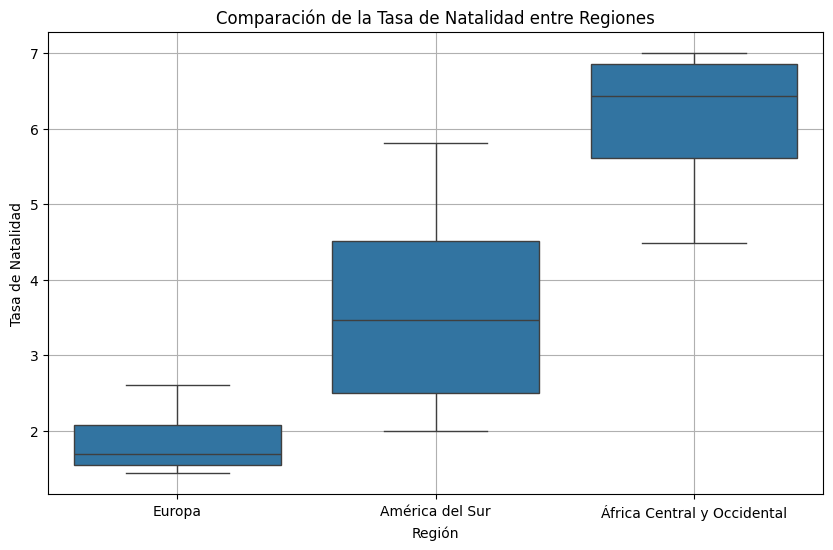

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Región', y='Tasa de Natalidad', data=df_anova)
plt.title('Comparación de la Tasa de Natalidad entre Regiones')
plt.grid(True)
plt.show()

### Para poner esto en manifiesto debemos sumar la variable del pbi per capita de los paises, entonces agregamos el dataset de la evolucion anual del pbi per capita. También sumaremos la Variable tasa de alfabetización y veremos si la alfabetización tiene un papel significativo en la tasa de natalidad.

In [30]:
df2 = pd.read_csv('pbi.csv')# dataset del pbi

In [31]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"-2,2648691065","-1,2555886102","1,1211829579","6,4749086233","1,8764014375","-2,7434014798","-24,0845698974","27,6968645872","10,553786048",NaN
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-2,1430646955","4,9987810491","2,7864343322","1,8104038259","2,2347190315",...,"1,1755695519","0,2032888173","-0,5301153616","-0,0041613455","-0,0064791405","-0,4887229065","-5,3161850655","1,8418817434","0,985594676","0,0884836543"
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"-0,9648033309","-1,6664164147","-0,3458024955","-0,253593781","-1,6885765916","0,9328333856","-5,3646659296","-22,9669419946","-8,5866519008",NaN
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-0,2373129791","1,5291098069","4,8487303198","3,125918135","1,8191286469",...,"3,0898585674","0,0882581213","-2,5036445511","-0,4102035071","0,1688980428","0,5729549192","-3,5277890553","1,385814752","1,2138567095","0,782040907"
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,030729118","-2,6429753303","-6,0118907775","-3,630695038","-4,6766695843","-4,017114161","-8,6724321291","-1,9545980064","-0,0967547298","-2,1550773779"


In [32]:
#realizamos el eda del pbi
# Buscamos filas duplicadas
duplicados = df2[df2.duplicated()]
print("Filas duplicadas excluyendo la primera aparición")
print(duplicados)

Filas duplicadas excluyendo la primera aparición
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Index: []

[0 rows x 68 columns]


In [33]:
# Buscamos valores nulos
df2.isnull().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019                9
2020               10
2021               11
2022               17
2023               34
Length: 68, dtype: int64

In [34]:
filas_con_null = df2[df2.isnull().any(axis = 1)]
filas_con_null

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"-2,2648691065","-1,2555886102","1,1211829579","6,4749086233","1,8764014375","-2,7434014798","-24,0845698974","27,6968645872","10,553786048",NaN
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-2,1430646955","4,9987810491","2,7864343322","1,8104038259","2,2347190315",...,"1,1755695519","0,2032888173","-0,5301153616","-0,0041613455","-0,0064791405","-0,4887229065","-5,3161850655","1,8418817434","0,985594676","0,0884836543"
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"-0,9648033309","-1,6664164147","-0,3458024955","-0,253593781","-1,6885765916","0,9328333856","-5,3646659296","-22,9669419946","-8,5866519008",NaN
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-0,2373129791","1,5291098069","4,8487303198","3,125918135","1,8191286469",...,"3,0898585674","0,0882581213","-2,5036445511","-0,4102035071","0,1688980428","0,5729549192","-3,5277890553","1,385814752","1,2138567095","0,782040907"
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,030729118","-2,6429753303","-6,0118907775","-3,630695038","-4,6766695843","-4,017114161","-8,6724321291","-1,9545980064","-0,0967547298","-2,1550773779"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,6535882955","7,3718275289","6,2036412067","4,0386744107","3,0566659988","5,2374029713","-5,4066381196","10,9995719906","5,3372748375","4,0269810914"
262,"Yemen, Rep. del",YEM,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"-2,9553892974","-29,9217612975","-11,7200183366","-7,4751131336","-1,7217347581",NaN,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"0,9779239386","3,061899477","4,1654981766","4,6852374196","2,8922054414",...,"-0,1722206093","-0,7579281141","-0,3091711673","0,766941613","0,3197704216","-1,0301329427","-7,1065887831","3,662368304","1,0568746777","-0,2652526883"
264,Zambia,ZMB,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-1,7876849731","-5,5414894436","0,0233605345","8,6860858645","12,9720329003",...,"1,3483692836","-0,3128612164","0,540360376","0,3521508403","0,8973474604","-1,564236877","-5,5957330599","3,2594577171","2,3864685433","2,9920835489"


### vamos a eliminar la columna del año 2023 ya que hicimos lo mismo en el dataset de la tasa de natalidad. esto lo hacemos para tener la misma cantidad de columnas y poder realizar bien el analisis

In [35]:
df2 = df2.drop('2023', axis = 1)
df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"5,6369707589","-2,2648691065","-1,2555886102","1,1211829579","6,4749086233","1,8764014375","-2,7434014798","-24,0845698974","27,6968645872","10,553786048"
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-2,1430646955","4,9987810491","2,7864343322","1,8104038259","2,2347190315",...,"1,4303709934","1,1755695519","0,2032888173","-0,5301153616","-0,0041613455","-0,0064791405","-0,4887229065","-5,3161850655","1,8418817434","0,985594676"
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,0025221458","-0,9648033309","-1,6664164147","-0,3458024955","-0,253593781","-1,6885765916","0,9328333856","-5,3646659296","-22,9669419946","-8,5866519008"
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-0,2373129791","1,5291098069","4,8487303198","3,125918135","1,8191286469",...,"3,254876848","3,0898585674","0,0882581213","-2,5036445511","-0,4102035071","0,1688980428","0,5729549192","-3,5277890553","1,385814752","1,2138567095"
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,1063310346","1,030729118","-2,6429753303","-6,0118907775","-3,630695038","-4,6766695843","-4,017114161","-8,6724321291","-1,9545980064","-0,0967547298"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,7028272288","3,6535882955","7,3718275289","6,2036412067","4,0386744107","3,0566659988","5,2374029713","-5,4066381196","10,9995719906","5,3372748375"
262,"Yemen, Rep. del",YEM,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,8688082841","-2,9553892974","-29,9217612975","-11,7200183366","-7,4751131336","-1,7217347581",NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"0,9779239386","3,061899477","4,1654981766","4,6852374196","2,8922054414",...,"1,099461735","-0,1722206093","-0,7579281141","-0,3091711673","0,766941613","0,3197704216","-1,0301329427","-7,1065887831","3,662368304","1,0568746777"
264,Zambia,ZMB,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,"-1,7876849731","-5,5414894436","0,0233605345","8,6860858645","12,9720329003",...,"1,6763959805","1,3483692836","-0,3128612164","0,540360376","0,3521508403","0,8973474604","-1,564236877","-5,5957330599","3,2594577171","2,3864685433"


In [36]:
columnas_numericas = df2.iloc[:,4:]
columnas_numericas.head(50)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"5,6369707589","-2,2648691065","-1,2555886102","1,1211829579","6,4749086233","1,8764014375","-2,7434014798","-24,0845698974","27,6968645872","10,553786048"
1,NaN,"-2,1430646955","4,9987810491","2,7864343322","1,8104038259","2,2347190315","1,9610595466","2,4739503731","1,2329086083","2,1192291346",...,"1,4303709934","1,1755695519","0,2032888173","-0,5301153616","-0,0041613455","-0,0064791405","-0,4887229065","-5,3161850655","1,8418817434","0,985594676"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,0025221458","-0,9648033309","-1,6664164147","-0,3458024955","-0,253593781","-1,6885765916","0,9328333856","-5,3646659296","-22,9669419946","-8,5866519008"
3,NaN,"-0,2373129791","1,5291098069","4,8487303198","3,125918135","1,8191286469","-3,7257279243","-11,1240319275","-0,7155424324","12,6485525652",...,"3,254876848","3,0898585674","0,0882581213","-2,5036445511","-0,4102035071","0,1688980428","0,5729549192","-3,5277890553","1,385814752","1,2138567095"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,1063310346","1,030729118","-2,6429753303","-6,0118907775","-3,630695038","-4,6766695843","-4,017114161","-8,6724321291","-1,9545980064","-0,0967547298"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,1872343529","1,9853880918","2,5168270542","3,4802932167","3,8981122675","4,2763115511","2,5235408428","-2,7452386776","9,9227137081","6,1390167899"
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"-4,0260270343","2,1409389822","1,2574160127","2,5745045877","-1,4165790204","-0,0038702956","0,2382965695","-12,7350775611","6,4594405318","8,4794695052"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,795092549","7,7390663464","4,4624109759",...,"0,2152341535","0,1217296204","1,2056016289","1,4687629722","-0,5461563896","0,516143649","-0,3836622611","-7,0352064001","3,4375095396","3,9344098765"
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4,0126921454","3,1742024869","5,8173578713","4,653505395","-0,0873260714","0,5172398887","0,3236865268","-5,7310445216","3,4872146629","6,9824174662"
9,NaN,"3,740902814","-2,4543330322","-6,8313933149","8,3827514767","8,8388502121","-2,2092854101","1,5872412183","3,2081560501","8,001733126",...,"1,2656851754","-3,5785805098","1,6296642795","-3,1100638982","1,7576481827","-3,6016097566","-2,9695624987","-10,7702732277","9,6739209347","3,9891310845"


### Applymap toma cada elemento del dataframe, entonces lambda recibe un elemento del data frame. x.replace(',','.') reemplaza las comas por puntos en los datos que son de tipo string y sino es de tipo string se usa esta parte: if isinstance(x,str) else x --> lo que hace es que verifica el valor de x si es una cadena o un dato de tipo string si es asi aplica x.replace(',','.') y si es otro dato lo deja como está (else x)

In [37]:
#tenemos q cambiar la "coma decimal" por "punto" decimal
df2 = df2.applymap(lambda x: x.replace(',','.') if isinstance(x,str) else x)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6140\2612048279.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [272]:
df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6369707589,-2.2648691065,-1.2555886102,1.1211829579,6.4749086233,1.8764014375,-2.7434014798,-24.0845698974,27.6968645872,10.553786048
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-2.1430646955,4.9987810491,2.7864343322,1.8104038259,2.2347190315,...,1.4303709934,1.1755695519,0.2032888173,-0.5301153616,-0.0041613455,-0.0064791405,-0.4887229065,-5.3161850655,1.8418817434,0.985594676
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0025221458,-0.9648033309,-1.6664164147,-0.3458024955,-0.253593781,-1.6885765916,0.9328333856,-5.3646659296,-22.9669419946,-8.5866519008
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-0.2373129791,1.5291098069,4.8487303198,3.125918135,1.8191286469,...,3.254876848,3.0898585674,0.0882581213,-2.5036445511,-0.4102035071,0.1688980428,0.5729549192,-3.5277890553,1.385814752,1.2138567095
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1063310346,1.030729118,-2.6429753303,-6.0118907775,-3.630695038,-4.6766695843,-4.017114161,-8.6724321291,-1.9545980064,-0.0967547298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7028272288,3.6535882955,7.3718275289,6.2036412067,4.0386744107,3.0566659988,5.2374029713,-5.4066381196,10.9995719906,5.3372748375
262,Yemen. Rep. del,YEM,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8688082841,-2.9553892974,-29.9217612975,-11.7200183366,-7.4751131336,-1.7217347581,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,0.9779239386,3.061899477,4.1654981766,4.6852374196,2.8922054414,...,1.099461735,-0.1722206093,-0.7579281141,-0.3091711673,0.766941613,0.3197704216,-1.0301329427,-7.1065887831,3.662368304,1.0568746777
264,Zambia,ZMB,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-1.7876849731,-5.5414894436,0.0233605345,8.6860858645,12.9720329003,...,1.6763959805,1.3483692836,-0.3128612164,0.540360376,0.3521508403,0.8973474604,-1.564236877,-5.5957330599,3.2594577171,2.3864685433


In [38]:
columnas_numericas = df2.iloc[:,4:]
columnas_numericas.head(50)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6369707589,-2.2648691065,-1.2555886102,1.1211829579,6.4749086233,1.8764014375,-2.7434014798,-24.0845698974,27.6968645872,10.553786048
1,NaN,-2.1430646955,4.9987810491,2.7864343322,1.8104038259,2.2347190315,1.9610595466,2.4739503731,1.2329086083,2.1192291346,...,1.4303709934,1.1755695519,0.2032888173,-0.5301153616,-0.0041613455,-0.0064791405,-0.4887229065,-5.3161850655,1.8418817434,0.985594676
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0025221458,-0.9648033309,-1.6664164147,-0.3458024955,-0.253593781,-1.6885765916,0.9328333856,-5.3646659296,-22.9669419946,-8.5866519008
3,NaN,-0.2373129791,1.5291098069,4.8487303198,3.125918135,1.8191286469,-3.7257279243,-11.1240319275,-0.7155424324,12.6485525652,...,3.254876848,3.0898585674,0.0882581213,-2.5036445511,-0.4102035071,0.1688980428,0.5729549192,-3.5277890553,1.385814752,1.2138567095
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1063310346,1.030729118,-2.6429753303,-6.0118907775,-3.630695038,-4.6766695843,-4.017114161,-8.6724321291,-1.9545980064,-0.0967547298
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1872343529,1.9853880918,2.5168270542,3.4802932167,3.8981122675,4.2763115511,2.5235408428,-2.7452386776,9.9227137081,6.1390167899
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0260270343,2.1409389822,1.2574160127,2.5745045877,-1.4165790204,-0.0038702956,0.2382965695,-12.7350775611,6.4594405318,8.4794695052
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.795092549,7.7390663464,4.4624109759,...,0.2152341535,0.1217296204,1.2056016289,1.4687629722,-0.5461563896,0.516143649,-0.3836622611,-7.0352064001,3.4375095396,3.9344098765
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0126921454,3.1742024869,5.8173578713,4.653505395,-0.0873260714,0.5172398887,0.3236865268,-5.7310445216,3.4872146629,6.9824174662
9,NaN,3.740902814,-2.4543330322,-6.8313933149,8.3827514767,8.8388502121,-2.2092854101,1.5872412183,3.2081560501,8.001733126,...,1.2656851754,-3.5785805098,1.6296642795,-3.1100638982,1.7576481827,-3.6016097566,-2.9695624987,-10.7702732277,9.6739209347,3.9891310845


In [39]:
columnas_numericas.dtypes

1960    float64
1961     object
1962     object
1963     object
1964     object
         ...   
2018     object
2019     object
2020     object
2021     object
2022     object
Length: 63, dtype: object

In [40]:
#debemos pasar a float todos los datos del dataset
columnas_numericas = columnas_numericas.apply(pd.to_numeric, errors = 'coerce')

In [41]:
columnas_numericas.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
         ...   
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
Length: 63, dtype: object

In [42]:
df2[columnas_numericas.columns] = columnas_numericas.apply(lambda fila: fila.fillna(fila.mean()))

In [43]:
df2.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,5.636971,-2.264869,-1.255589,1.121183,6.474909,1.876401,-2.743401,-24.084570,27.696865,10.553786
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-2.143065,4.998781,2.786434,1.810404,2.234719,...,1.430371,1.175570,0.203289,-0.530115,-0.004161,-0.006479,-0.488723,-5.316185,1.841882,0.985595
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,-8.586652
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,-0.237313,1.529110,4.848730,3.125918,1.819129,...,3.254877,3.089859,0.088258,-2.503645,-0.410204,0.168898,0.572955,-3.527789,1.385815,1.213857
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,1.106331,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755
5,Albania,ALB,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,1.187234,1.985388,2.516827,3.480293,3.898112,4.276312,2.523541,-2.745239,9.922714,6.139017
6,Andorra,AND,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.003870,0.238297,-12.735078,6.459441,8.479470
7,El mundo árabe,ARB,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,0.215234,0.121730,1.205602,1.468763,-0.546156,0.516144,-0.383662,-7.035206,3.437510,3.934410
8,Emiratos Árabes Unidos,ARE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,1.548912,2.888772,2.783319,4.032984,3.574170,...,4.012692,3.174202,5.817358,4.653505,-0.087326,0.517240,0.323687,-5.731045,3.487215,6.982417
9,Argentina,ARG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,NaN,3.740903,-2.454333,-6.831393,8.382751,8.838850,...,1.265685,-3.578581,1.629664,-3.110064,1.757648,-3.601610,-2.969562,-10.770273,9.673921,3.989131


In [44]:
columnas_numericas = df2.columns[4:]
promedios_fila = df2[columnas_numericas].mean(axis=1)
df2.iloc[:, 4:] = df2.iloc[:, 4:].fillna(promedios_fila)
df2['1960'] = df2['1960'].fillna(promedios_fila)

In [45]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,2.268223,1.548912,2.888772,2.783319,4.032984,3.574170,...,5.636971,-2.264869,-1.255589,1.121183,6.474909,1.876401,-2.743401,-24.084570,27.696865,10.553786
1,NaN,AFE,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,0.364052,-2.143065,4.998781,2.786434,1.810404,2.234719,...,1.430371,1.175570,0.203289,-0.530115,-0.004161,-0.006479,-0.488723,-5.316185,1.841882,0.985595
2,Afganistán,AFG,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,1.675288,1.548912,2.888772,2.783319,4.032984,3.574170,...,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,-8.586652
3,NaN,AFW,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,0.900045,-0.237313,1.529110,4.848730,3.125918,1.819129,...,3.254877,3.089859,0.088258,-2.503645,-0.410204,0.168898,0.572955,-3.527789,1.385815,1.213857
4,Angola,AGO,Crecimiento del PIB per cápita (% anual),NY.GDP.PCAP.KD.ZG,0.810904,1.548912,2.888772,2.783319,4.032984,3.574170,...,1.106331,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755


In [46]:
df3 = pd.read_csv('alfabetizacion.csv', quotechar='"', on_bad_lines='skip')

In [47]:
df3.head(100)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.519997,NaN,NaN
1,NaN,AFE,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,79.828262,80.255722,80.648651,81.253433,81.632019,81.925377,82.461998,82.590721,82.739067,82.968941
2,Afganistán,AFG,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,64.340004,NaN,NaN,NaN,NaN,NaN,55.929401,NaN
3,NaN,AFW,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.038567,66.151421,67.169121,67.622658,68.720016,70.955078,70.704674,70.887108,71.261879,71.599808
4,Angola,AGO,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.431129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ingreso alto,HIC,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"Hong Kong, Región Administrativa Especial",HKG,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Honduras,HND,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.070000,95.680000,96.010002,96.129997,NaN,96.519997,96.080002,NaN,NaN,NaN
98,Países pobres muy endeudados (PPME),HPC,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,71.425774,72.406776,73.164902,73.830513,74.904404,75.533188,75.683800,75.988869,76.448547,76.949371


In [56]:
df3.iloc[:,4:] = df3.iloc[:,4:].apply(lambda fila: fila.fillna(fila.mean()), axis = 1)

In [57]:
df3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,...,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.519997,99.228274,99.228274
1,NaN,AFE,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,...,79.828262,80.255722,80.648651,81.253433,81.632019,81.925377,82.461998,82.590721,82.739067,82.968941
2,Afganistán,AFG,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,...,49.331452,49.331452,64.340004,49.331452,49.331452,49.331452,49.331452,49.331452,55.929401,49.331452
3,NaN,AFW,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,63.026706,63.026706,63.026706,63.026706,63.026706,63.026706,...,65.038567,66.151421,67.169121,67.622658,68.720016,70.955078,70.704674,70.887108,71.261879,71.599808
4,Angola,AGO,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,...,77.641874,77.431129,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,83.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep. del",YEM,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071,...,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071,68.611071
263,Sudáfrica,ZAF,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,96.632502,96.632502,96.632502,96.632502,96.632502,96.632502,...,96.632502,98.882278,98.955780,96.632502,95.323822,96.632502,98.409531,96.632502,96.695923,96.632502
264,Zambia,ZMB,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,75.148565,75.148565,75.148565,75.148565,75.148565,75.148565,...,75.148565,75.148565,75.148565,75.148565,75.148565,75.148565,75.148565,93.199997,75.148565,75.148565


### En este dataset, hay mucha información faltante, llenamos los faltantes con la media basandonos en el teorema del limite central, de todas formas la variacion de estos a lo largo del tiempo es muy baja.

### Vamos a alinear los dataset para poder realizar un analisis de regresion multiple y ver si el pbi y la alfabetización se ajustan con un modelo lineal a la baja de la tasa de natalidad.

In [62]:
df_natalidad = df.iloc[:,[0]].join(df.iloc[:, 4:])
df_pbi = df2.iloc[:,[0]].join(df2.iloc[:, 4:])
df_alfa = df3.iloc[:,[0]].join(df3.iloc[:, 4:])

In [63]:
df_natalidad.head(3)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,4.820000,4.655000,4.47100,4.271000,4.05900,3.842000,3.625000,3.417000,3.22600,...,2.11700,2.148000,1.972000,1.95300,1.839000,1.587000,1.486000,1.3250,1.180000,1.179000
1,NaN,6.724125,6.742752,6.76293,6.778712,6.78842,6.800322,6.810571,6.818612,6.82856,...,4.80882,4.739861,4.677618,4.61567,4.570409,4.527705,4.482898,4.4169,4.354709,4.288788
2,Afganistán,7.282000,7.284000,7.29200,7.302000,7.30400,7.305000,7.320000,7.339000,7.36300,...,5.69600,5.560000,5.405000,5.26200,5.129000,5.002000,4.870000,4.7500,4.643000,4.523000


In [64]:
df_pbi.head(3)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,2.268223,1.548912,2.888772,2.783319,4.032984,3.574170,2.432733,1.788848,3.941748,...,5.636971,-2.264869,-1.255589,1.121183,6.474909,1.876401,-2.743401,-24.084570,27.696865,10.553786
1,NaN,0.364052,-2.143065,4.998781,2.786434,1.810404,2.234719,1.961060,2.473950,1.232909,...,1.430371,1.175570,0.203289,-0.530115,-0.004161,-0.006479,-0.488723,-5.316185,1.841882,0.985595
2,Afganistán,1.675288,1.548912,2.888772,2.783319,4.032984,3.574170,2.432733,1.788848,3.941748,...,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,-8.586652


In [65]:
df_alfa.head(3)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,...,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.519997,99.228274,99.228274
1,NaN,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,...,79.828262,80.255722,80.648651,81.253433,81.632019,81.925377,82.461998,82.590721,82.739067,82.968941
2,Afganistán,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,...,49.331452,49.331452,64.340004,49.331452,49.331452,49.331452,49.331452,49.331452,55.929401,49.331452


In [66]:
columnas_numericas = df_alfa.select_dtypes(include=['float64', 'int64']).columns
promedios_fila = df_alfa[columnas_numericas].mean(axis=1)
df_alfa[columnas_numericas] = df_alfa[columnas_numericas].apply(lambda x: x.fillna(promedios_fila), axis=1)

In [241]:
df_alfa.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,...,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.228274,99.519997,99.228274,99.228274
1,NaN,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,74.684358,...,79.828262,80.255722,80.648651,81.253433,81.632019,81.925377,82.461998,82.590721,82.739067,82.968941
2,Afganistán,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,49.331452,...,49.331452,49.331452,64.340004,49.331452,49.331452,49.331452,49.331452,49.331452,55.929401,49.331452
3,NaN,63.026706,63.026706,63.026706,63.026706,63.026706,63.026706,63.026706,63.026706,63.026706,...,65.038567,66.151421,67.169121,67.622658,68.720016,70.955078,70.704674,70.887108,71.261879,71.599808
4,Angola,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,...,77.641874,77.431129,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,77.641874,83.300003


### Hacemos un melt (formato largo) de los dataset para despues poder hacer el merge en 'años' y 'paises'

In [67]:
df_natalidad_melt = df_natalidad.melt(id_vars = 'Country Name', var_name ='Año', value_name = 'Tasa de natalidad')
df_pbi_melt = df_pbi.melt(id_vars = 'Country Name', var_name ='Año', value_name = 'PBI per Capita')
df_alfa_melt = df_alfa.melt(id_vars = 'Country Name', var_name ='Año', value_name = 'Tasa de Alfabetizacion')

In [68]:
df_natalidad.head(100)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,NaN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,6.828560,...,4.808820,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,Afganistán,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,7.363000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,NaN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,6.612775,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,Angola,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,7.332000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ingreso alto,2.940785,2.923792,2.874867,2.844653,2.813825,2.723950,2.581993,2.615456,2.543171,...,1.664427,1.680555,1.681578,1.675753,1.632325,1.602555,1.568929,1.530886,1.542454,1.500867
96,"Hong Kong, Región Administrativa Especial",5.067000,5.168000,5.145000,5.089000,5.012000,4.920000,4.459000,4.043000,3.760000,...,1.125000,1.235000,1.196000,1.205000,1.128000,1.080000,1.064000,0.883000,0.772000,0.701000
97,Honduras,7.458000,7.448000,7.443000,7.441000,7.443000,7.442000,7.384000,7.334000,7.289000,...,2.699000,2.635000,2.581000,2.536000,2.496000,2.460000,2.427000,2.394000,2.363000,2.340000
98,Países pobres muy endeudados (PPME),6.702820,6.722266,6.744507,6.764725,6.779095,6.793623,6.812075,6.833059,6.854935,...,5.176238,5.099250,5.032747,4.962558,4.889033,4.823743,4.762412,4.691540,4.620300,4.546536


In [69]:
df_temp = pd.merge(df_natalidad_melt,df_pbi_melt, on = ['Country Name', 'Año'])

In [70]:
df4 = pd.merge(df_temp,df_alfa_melt, on = ['Country Name', 'Año'])

In [71]:
df4.head(50)

,Country Name,Año,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,Aruba,1960,4.820000,2.268223,99.228274
1,NaN,1960,6.724125,0.364052,74.684358
2,NaN,1960,6.724125,0.364052,63.026706
3,NaN,1960,6.724125,0.900045,74.684358
4,NaN,1960,6.724125,0.900045,63.026706
5,Afganistán,1960,7.282000,1.675288,49.331452
6,NaN,1960,6.458448,0.364052,74.684358
7,NaN,1960,6.458448,0.364052,63.026706
8,NaN,1960,6.458448,0.900045,74.684358
9,NaN,1960,6.458448,0.900045,63.026706


In [72]:
df5 = df4[df4['Country Name'] != 'Ingreso mediano']

In [73]:
df5.head()

,Country Name,Año,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,Aruba,1960,4.820000,2.268223,99.228274
1,NaN,1960,6.724125,0.364052,74.684358
2,NaN,1960,6.724125,0.364052,63.026706
3,NaN,1960,6.724125,0.900045,74.684358
4,NaN,1960,6.724125,0.900045,63.026706


In [74]:
df4['Country Name'] = df4['Country Name'].str.strip()

In [75]:
df5 = df4[df4['Country Name'] != 'Ingreso mediano']

In [76]:
df5

,Country Name,Año,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,Aruba,1960,4.820000,2.268223,99.228274
1,NaN,1960,6.724125,0.364052,74.684358
2,NaN,1960,6.724125,0.364052,63.026706
3,NaN,1960,6.724125,0.900045,74.684358
4,NaN,1960,6.724125,0.900045,63.026706
...,...,...,...,...,...
16564,Samoa,2022,3.875000,-6.846891,98.972523
16565,Kosovo,2022,1.510000,5.337275,NaN
16566,Sudáfrica,2022,2.341000,1.056875,96.632502
16567,Zambia,2022,4.242000,2.386469,75.148565


In [77]:
df_limpio = df5[~df5['Country Name'].str.contains('ingresos bajos|ingresos altos', case=False, na=False)]

In [78]:
df_limpio

,Country Name,Año,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,Aruba,1960,4.820000,2.268223,99.228274
1,NaN,1960,6.724125,0.364052,74.684358
2,NaN,1960,6.724125,0.364052,63.026706
3,NaN,1960,6.724125,0.900045,74.684358
4,NaN,1960,6.724125,0.900045,63.026706
...,...,...,...,...,...
16564,Samoa,2022,3.875000,-6.846891,98.972523
16565,Kosovo,2022,1.510000,5.337275,NaN
16566,Sudáfrica,2022,2.341000,1.056875,96.632502
16567,Zambia,2022,4.242000,2.386469,75.148565


### Nota: '~' es el operador de negacion en pandas osea que en este caso el df_limpio va a contener todo lo q no contenga ingresos bajos o ingresos altos, case = False es para sacar el caseSensitive y na = False obvia los Nan

### Vemos que seguimos teniendo registros con Nan esto es porque en algunos de los datasets estos paises no tienen datos, entonces vamos a eliminar esos registros directamente.

In [79]:
df_limpio = df_limpio.dropna()

In [80]:
df_limpio

,Country Name,Año,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,Aruba,1960,4.820000,2.268223,99.228274
5,Afganistán,1960,7.282000,1.675288,49.331452
10,Angola,1960,6.708000,0.810904,77.641874
11,Albania,1960,6.455000,2.860700,98.721279
13,El mundo árabe,1960,6.934332,2.015329,78.393633
...,...,...,...,...,...
16563,Mundo,2022,2.261279,2.277611,92.733009
16564,Samoa,2022,3.875000,-6.846891,98.972523
16566,Sudáfrica,2022,2.341000,1.056875,96.632502
16567,Zambia,2022,4.242000,2.386469,75.148565


### Vamos a Estudiar la correlacion que hay entre nuestras variables para ver si estas son buenos predictores de nuestro modelo de regresion lineal multiple

In [81]:
dataCorr = df_limpio.iloc[:, 2:]
dataCorr

,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,4.820000,2.268223,99.228274
5,7.282000,1.675288,49.331452
10,6.708000,0.810904,77.641874
11,6.455000,2.860700,98.721279
13,6.934332,2.015329,78.393633
...,...,...,...
16563,2.261279,2.277611,92.733009
16564,3.875000,-6.846891,98.972523
16566,2.341000,1.056875,96.632502
16567,4.242000,2.386469,75.148565


## Matriz de correlacion

In [82]:
matriz = dataCorr.corr()
print(matriz)

                        Tasa de natalidad  PBI per Capita  \
Tasa de natalidad                1.000000       -0.057944   
PBI per Capita                  -0.057944        1.000000   
Tasa de Alfabetizacion          -0.603043        0.092683   

                        Tasa de Alfabetizacion  
Tasa de natalidad                    -0.603043  
PBI per Capita                        0.092683  
Tasa de Alfabetizacion                1.000000  


### Teniendo en cuenta que el coeficiente de correlación varía entre: -1<r<1 podemos ver como se relacionan las distintas variables, obviamente entre la misma variable la correlación será de 1.

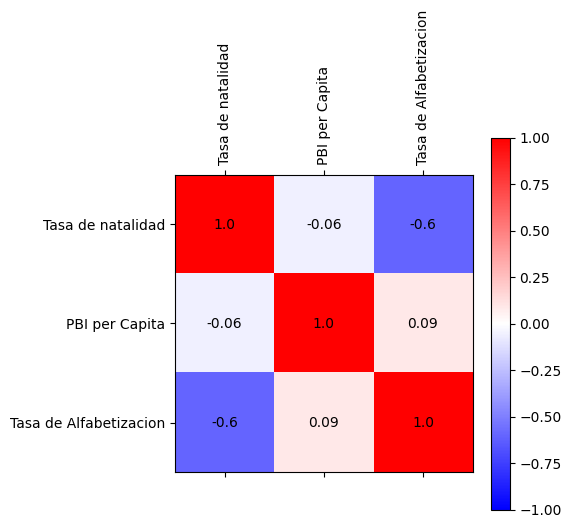

In [83]:
# grafico de la matriz de correlación

plt.matshow(matriz, cmap = "bwr", vmin = -1, vmax = 1)

plt.xticks(range(3), dataCorr.columns, rotation = 90)
plt.yticks(range(3), dataCorr.columns)

for i in range (len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i,j],2), ha = "center", va = "center")

plt.colorbar()
plt.show()

### A priori podemos observar para nuestra sorpresa que lo que mas influye en la tasa de natalidad es la tasa de alfabetización, es decir cuando aumenta la tasa de alfabetización disminuye de manera notable la tasa de natalidad (r = -0,61). Uno tendería a pensar que la variable mas influyente es el pbi o la economia (r =-0,06 ) pero vemos q esta aporta muy poco a la disminucion de la tasa de natalidad.

## Distribución de las variables

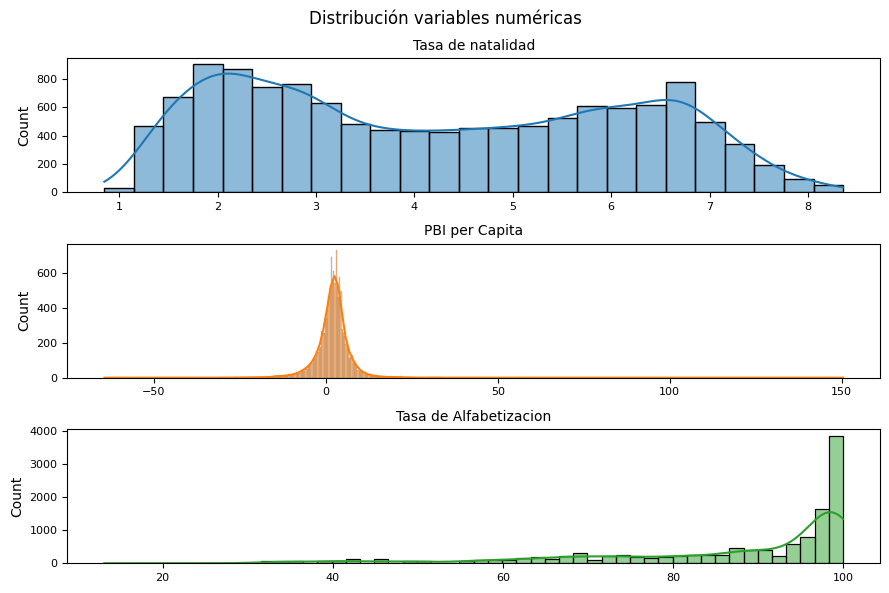

In [84]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 6))
axes = axes.flat
columnas_numericas = dataCorr.select_dtypes(include=np.number).columns

for i, colum in enumerate(columnas_numericas):
    sns.histplot(
        data    = dataCorr,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12);

### Tener tres variables con distribuciones tan diferentes, como una bimodal, otra con forma similar a una distribución t de Student, y una sesgada a la izquierda,nos sugiere que las características de cada variable podrían influir de manera distinta en su relación con las otras variables. 
### Esto nos sugiere que tal vez el modelo de regresión multiple no sea el mejor. Pero continuaremos hasta llegar a los resultados para sacar conclusiones

## Regresion Multiple

### yi=β0+β1xi1+β2xi2+...+βpxip+ϵi
- β0: es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta y cuando todos los predictores son cero.
- βj: es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora xj, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.
- e: es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en y pero que no se incluyen en el modelo como predictores.

## Ajuste del modelo

In [85]:
datos_reg_multi = df_limpio[['Tasa de natalidad','PBI per Capita','Tasa de Alfabetizacion']]
datos_reg_multi.head()

,Tasa de natalidad,PBI per Capita,Tasa de Alfabetizacion
0,4.820000,2.268223,99.228274
5,7.282000,1.675288,49.331452
10,6.708000,0.810904,77.641874
11,6.455000,2.860700,98.721279
13,6.934332,2.015329,78.393633


In [86]:
# Separamos las variables predictoras y de respuesta y hacemos el split de datos 'train' y 'test'

X = datos_reg_multi[['PBI per Capita','Tasa de Alfabetizacion']]
y = datos_reg_multi['Tasa de natalidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

# Creamos el modelo de regresión lineal
regresion_multiple = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento.
regresion_multiple.fit(X_train, y_train)

LinearRegression()

In [87]:
# Realizamos las predicciones con los datos de prueba
y_pred = regresion_multiple.predict(X_test)

In [88]:
# Calculamos el coeficiente de determinación R^2 y el error cuadrático medio (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Coeficiente de determinación R^2: {}'.format(r2))
print('Error cuadrático medio (MSE): {}'.format(mse))

Coeficiente de determinación R^2: 0.3653300230630939
Error cuadrático medio (MSE): 2.423957895680625


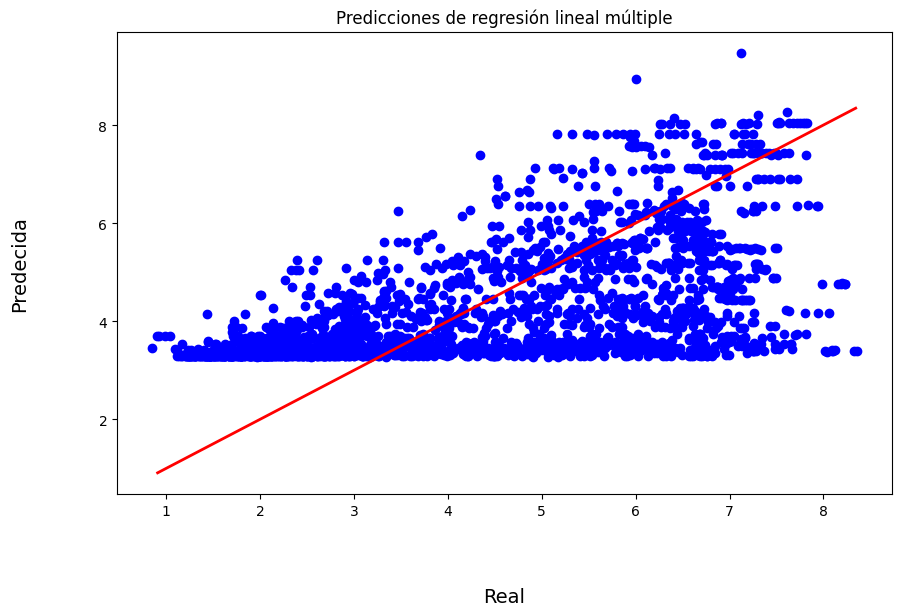

In [89]:
#Visualización real vs predecido
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test,y_pred, color ='blue', label='Datos Reales')
ax.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'red', linewidth = 2, label = 'Predicciones')

ax.set_xlabel('Real', fontsize = 14, labelpad = 50)
ax.set_ylabel('Predecida',fontsize = 14, labelpad = 50)
ax.set_title('Predicciones de regresión lineal múltiple')
plt.show()

### Veamos los datos que nos arroja el Statsmodels:

In [90]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Tasa de natalidad   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     2859.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:37:43   Log-Likelihood:                -18509.
No. Observations:               10029   AIC:                         3.702e+04
Df Residuals:                   10026   BIC:                         3.705e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

### Vemos que el coeficiente de determinacion R^2 = 0.363 esto nos dice que el 36,3% de la variabilidad de los datos es explicada por el modelo, aunque vemos que el nivel de significacion de la prueba es de aproximadamente 0. esto es la Prob(F-static). osea que no podemos descartar el modelo del todo, ya que nuestro nivel de significancia es α =0.05 vemos el valor de significancia de F es mas chico por lo tanto deberiamos rechazar la H0 y decir que el modelo ajusta.
- Ho: β1 =0 --> la rechazamos (porque tenemos pendiente)
- H1: β1 ≠0
### Observemos las variables predictoras:
- PBI per Capita:  t = -0.132 | P>|t| :  0.895 la significancia es de 0.895 es decir mayor al 0.05
- Tasa de Alfabetizacion: t = -75.260 | P>|t| :0.000 la significancia es de 0.000 (aproximadamente 0) esta es la variable que aporta, es decir q es significativa

### Entonces podriamos decir que el producto interno bruto no tiene significancia sobre la tasa de natalidad. la descartamos y hacemos una regresion simple

In [91]:
datos = df_limpio[['Tasa de natalidad','Tasa de Alfabetizacion']]
datos.head()

,Tasa de natalidad,Tasa de Alfabetizacion
0,4.820000,99.228274
5,7.282000,49.331452
10,6.708000,77.641874
11,6.455000,98.721279
13,6.934332,78.393633


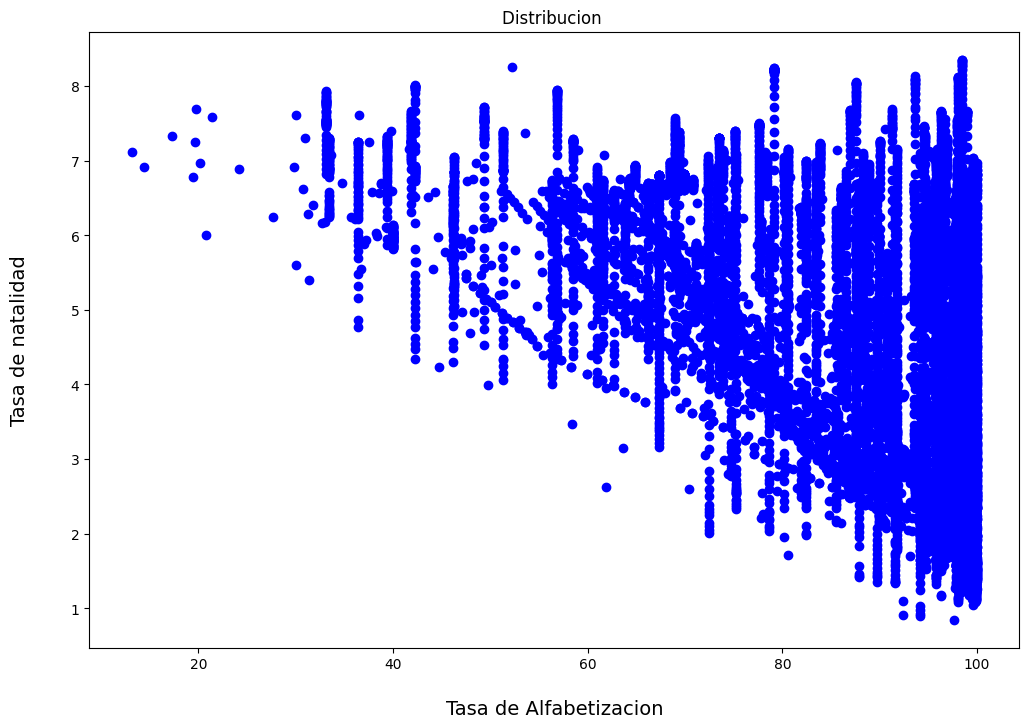

In [95]:
#Presentamos los datos con un diagrama de dispersion para poder ver si vemos alguna relación
#Nota lo hacemos con Axes para ajustar los ejes.
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(datos['Tasa de Alfabetizacion'], datos['Tasa de natalidad'], color ='blue')

ax.set_xlabel('Tasa de Alfabetizacion', fontsize = 14, labelpad = 20)
ax.set_ylabel('Tasa de natalidad',fontsize = 14, labelpad = 30)
ax.set_title('Distribucion ')
plt.show()

### Ahora si podemos ver una clara tendencia en la cual se aprecia que al subir la tasa de alfabetizacion la tasa de natalidad disminuye.

In [96]:
# dividimos los datos en train y test
X = datos[['Tasa de Alfabetizacion']]
y = datos['Tasa de natalidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 4, shuffle= True)

#creación del modelo:
modelo = LinearRegression()
#entrenamos el modelo:
modelo.fit(X = X_train, y = y_train)

LinearRegression()

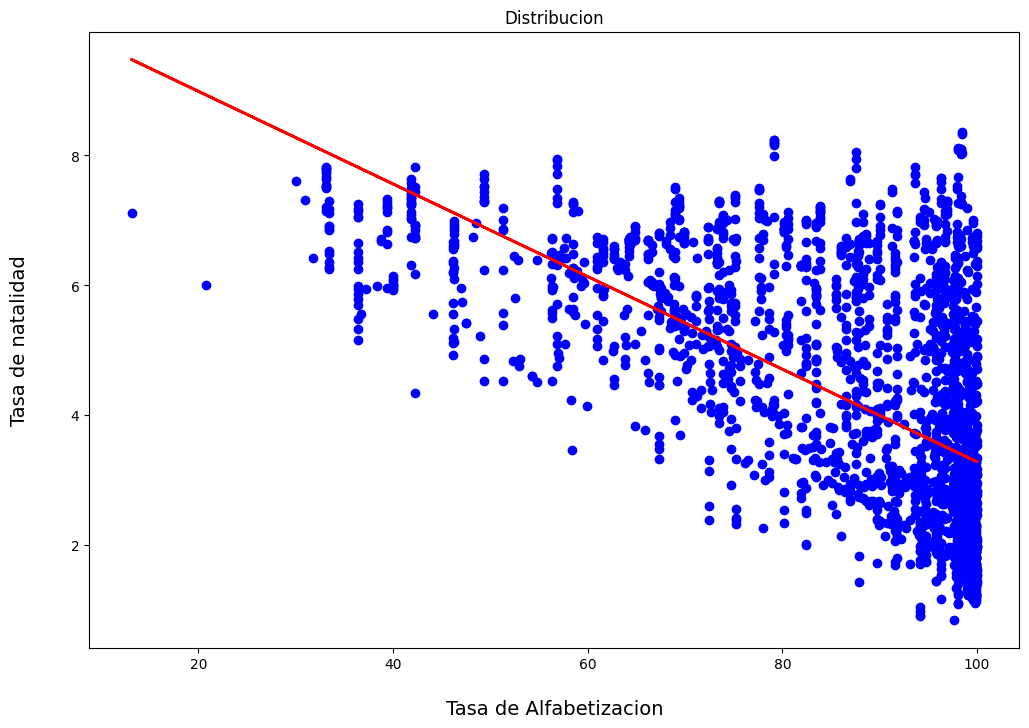

In [99]:
# Realizamos predicciones y graficamos
y_predecida = modelo.predict(X_test)

# graficamos

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test,y_test, color ='blue', label='Datos Reales')
ax.plot(X_test, y_predecida, color = 'red', linewidth = 2, label = 'Predicciones')

ax.set_xlabel('Tasa de Alfabetizacion', fontsize = 14, labelpad = 20)
ax.set_ylabel('Tasa de natalidad',fontsize = 14, labelpad = 30)
ax.set_title('Distribucion')
plt.show()

### Claramente los datos se ajustan por un modelo de regresión lineal, pero vamos a seguir evaluando el modelo para ver si el SRME, MAE Y R2 nos asevera esto.

In [100]:
print(f"Intercepto B0: {modelo.intercept_}")
print(f"Coeficiente B1-pendiente-:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de Determinación R^2:", modelo.score(X,y))

Intercepto B0: 10.414310798722171
Coeficiente B1-pendiente-: [('Tasa de Alfabetizacion', -0.07134838552500408)]
Coeficiente de Determinación R^2: 0.36364957442883217


In [101]:
mse = mean_squared_error(y_test, y_predecida)
mae = mean_absolute_error(y_test, y_predecida)
print(f"Error cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error cuadrático Medio (MSE): 2.4240009524710873
Error Absoluto Medio (MAE): 1.299368116689204


### comparamos con los resultados de statmodels

In [102]:
# dividimos los datos en train y test
X = datos[['Tasa de Alfabetizacion']]
y = datos['Tasa de natalidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123, shuffle= True)

In [103]:
X_train = sm.add_constant(X_train, prepend = True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Tasa de natalidad   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     5718.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:                -18509.
No. Observations:               10029   AIC:                         3.702e+04
Df Residuals:                   10027   BIC:                         3.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

### vemos que el coeficiente de determinación sigue siendo el mismo R^2 = 0.363, pero si nos fijamos en los datos de nuestro modelo el 36,3 es explicada solo por la tasa de alfabetización, podemos decir que el pbi no influye.

### Podríamos seguir incorporando variables o probar con algun otro modelo, pero se ve que la tasa de alfabetización tiene una fuerte influencia en la tasa de natalidad. es decir, a mayor tasa de alfabetización menor tasa de natalidad.